# Exploratory Data Analysis

In [33]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load the Data

In [92]:
## US Data ##

data = pd.read_csv("../data/covid_data.csv", dtype = str)

#Data types
data['date'] = pd.to_datetime(data['date'])
data['lat'] = pd.to_numeric(data['lat'])
data['long_'] = pd.to_numeric(data['long_'])
data['confirmed'] = pd.to_numeric(data['confirmed'])
data['deaths'] = pd.to_numeric(data['deaths'])

## Global Data ##
data_global = pd.read_csv("../data/covid_data_global.csv", dtype = str)

#Data types
data_global['date'] = pd.to_datetime(data['date'])
data_global['lat'] = pd.to_numeric(data_global['lat'])
data_global['long'] = pd.to_numeric(data_global['long'])
data_global['confirmed'] = pd.to_numeric(data_global['confirmed'])
data_global['deaths'] = pd.to_numeric(data_global['deaths'])


In [34]:
data.head()

,uid,iso2,iso3,code3,fips,county,province_state,country_region,lat,long_,combined_key,confirmed,deaths,date
0,16,AS,ASM,16,60,NaN,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",0,0,2020-01-22
1,316,GU,GUM,316,66,NaN,Guam,US,13.4443,144.7937,"Guam, US",0,0,2020-01-22
2,580,MP,MNP,580,69,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",0,0,2020-01-22
3,630,PR,PRI,630,72,NaN,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",0,0,2020-01-22
4,850,VI,VIR,850,78,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",0,0,2020-01-22


In [42]:
np.unique(data[data.province_state == 'New York'].county)

array(['Albany', 'Allegany', 'Bronx', 'Broome', 'Cattaraugus', 'Cayuga',
       'Chautauqua', 'Chemung', 'Chenango', 'Clinton', 'Columbia',
       'Cortland', 'Delaware', 'Dutchess', 'Erie', 'Essex', 'Franklin',
       'Fulton', 'Genesee', 'Greene', 'Hamilton', 'Herkimer', 'Jefferson',
       'Kings', 'Lewis', 'Livingston', 'Madison', 'Monroe', 'Montgomery',
       'Nassau', 'New York', 'Niagara', 'Oneida', 'Onondaga', 'Ontario',
       'Orange', 'Orleans', 'Oswego', 'Otsego', 'Out of NY', 'Putnam',
       'Queens', 'Rensselaer', 'Richmond', 'Rockland', 'Saratoga',
       'Schenectady', 'Schoharie', 'Schuyler', 'Seneca', 'St. Lawrence',
       'Steuben', 'Suffolk', 'Sullivan', 'Tioga', 'Tompkins', 'Ulster',
       'Unassigned', 'Warren', 'Washington', 'Wayne', 'Westchester',
       'Wyoming', 'Yates'], dtype=object)

In [44]:
data[(data.province_state == 'New York') & (data.county == 'New York')].head()

,uid,iso2,iso3,code3,fips,county,province_state,country_region,lat,long_,combined_key,confirmed,deaths,date
1863,84036061,US,USA,840,36061,New York,New York,US,40.767273,-73.971526,"New York City, New York, US",0,0,2020-01-22
5116,84036061,US,USA,840,36061,New York,New York,US,40.767273,-73.971526,"New York City, New York, US",0,0,2020-01-23
8369,84036061,US,USA,840,36061,New York,New York,US,40.767273,-73.971526,"New York City, New York, US",0,0,2020-01-24
11622,84036061,US,USA,840,36061,New York,New York,US,40.767273,-73.971526,"New York City, New York, US",0,0,2020-01-25
14875,84036061,US,USA,840,36061,New York,New York,US,40.767273,-73.971526,"New York City, New York, US",0,0,2020-01-26


## Time Trends

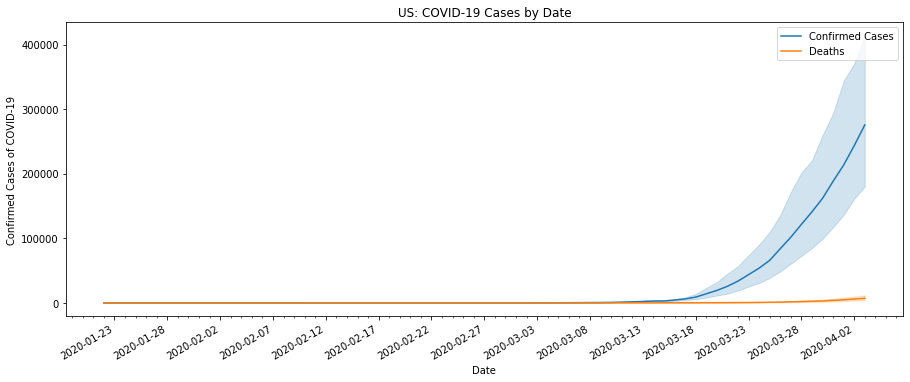

In [66]:
fig, ax = plt.subplots(figsize = (15,6))
sns.lineplot(x = data.date, y = data.confirmed, estimator = 'sum', label = 'Confirmed Cases')
sns.lineplot(x = data.date, y = data.deaths, estimator = 'sum', label = 'Deaths')
#Labels
plt.title("US: COVID-19 Cases by Date")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases of COVID-19")
#Format x-axis
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()
plt.show();

Xxx


## State Trends

### New York City Trends

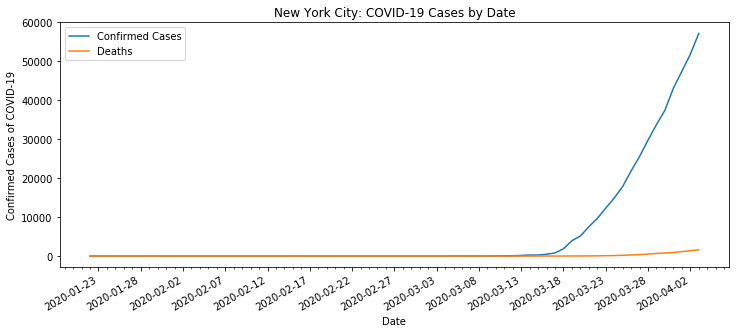

In [69]:
nyc = data[(data.province_state == 'New York') & (data.county == 'New York')]

fig, ax = plt.subplots(figsize = (12,5))
sns.lineplot(x = nyc.date, y = nyc.confirmed, estimator = 'mean', label = 'Confirmed Cases')
sns.lineplot(x = nyc.date, y = nyc.deaths, estimator = 'mean', label = 'Deaths')
#Labels
plt.title("New York City: COVID-19 Cases by Date")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases of COVID-19")
#Format x-axis
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()
plt.show();

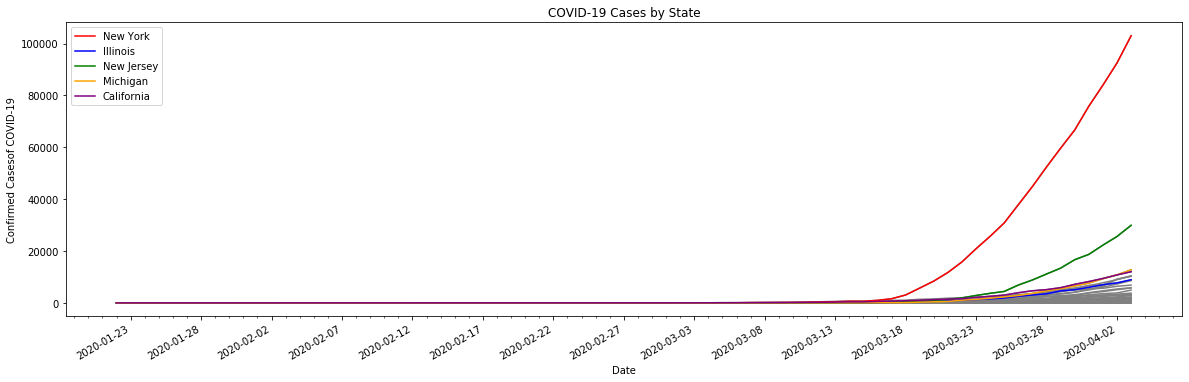

In [88]:

fig, ax = plt.subplots(figsize = (20,6))
#All states
for st in np.unique(data.province_state):
    sns.lineplot(x = data[data.province_state == st].date, y = data[data.province_state == st].confirmed, \
                 estimator = 'sum', err_style = None, color = "gray")
#Outlier states
for st, c in zip(["New York","Illinois","New Jersey","Michigan", "California"], \
                 ["red", "blue", "green", "orange", "purple"]):
    sns.lineplot(x = data[data.province_state == st].date, y = data[data.province_state == st].confirmed, \
                 label = st, estimator = 'sum', err_style = None, color = c)
#Labels
plt.title("COVID-19 Cases by State")
plt.xlabel("Date")
plt.ylabel("Confirmed Casesof COVID-19")
#Format x-axis
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()
plt.show();


xxx

In [89]:
data[data.date == '2020-04-02'].groupby(data.province_state).confirmed.sum().sort_values(ascending = False).head(10)

province_state
New York         92506
New Jersey       25590
Michigan         10791
California       10773
Louisiana         9159
Florida           9008
Massachusetts     8966
Illinois          7695
Pennsylvania      7268
Washington        6389
Name: confirmed, dtype: int64

In [90]:
data[data.date == '2020-04-02'].sort_values(by = ['confirmed'], axis = 0, ascending = False).head()


,uid,iso2,iso3,code3,fips,county,province_state,country_region,lat,long_,combined_key,confirmed,deaths,date
232826,84036061,US,USA,840,36061,New York,New York,US,40.767273,-73.971526,"New York City, New York, US",51809,1397,2020-04-02
232855,84036119,US,USA,840,36119,Westchester,New York,US,41.162784,-73.757417,"Westchester, New York, US",11567,64,2020-04-02
232825,84036059,US,USA,840,36059,Nassau,New York,US,40.740665,-73.589419,"Nassau, New York, US",10587,76,2020-04-02
232847,84036103,US,USA,840,36103,Suffolk,New York,US,40.883201,-72.801217,"Suffolk, New York, US",8746,69,2020-04-02
231578,84017031,US,USA,840,17031,Cook,Illinois,US,41.841448,-87.816588,"Cook, Illinois, US",5575,107,2020-04-02


### Italy

In [96]:
data_global[data_global.country_region == 'Italy']

,province_state,country_region,lat,long,confirmed,deaths,date
137,NaN,Italy,43.0,12.0,0,0,2020-01-22
395,NaN,Italy,43.0,12.0,0,0,2020-01-22
653,NaN,Italy,43.0,12.0,0,0,2020-01-22
911,NaN,Italy,43.0,12.0,0,0,2020-01-22
1169,NaN,Italy,43.0,12.0,0,0,2020-01-22
1427,NaN,Italy,43.0,12.0,0,0,2020-01-22
1685,NaN,Italy,43.0,12.0,0,0,2020-01-22
1943,NaN,Italy,43.0,12.0,0,0,2020-01-22
2201,NaN,Italy,43.0,12.0,0,0,2020-01-22
2459,NaN,Italy,43.0,12.0,2,0,2020-01-22
